### Predictive Insights from Portuguese Bank Marketing Data 

### Exploratory Data Analysis

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Load the cleaned data
data_bank = pd.read_csv('data_bank.csv')

In [14]:
# Basic Data Exploration
data_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,target
0,58,management,married,tertiary,no,2143,yes,no,other,5,may,261,1,999,0,other,no,0
1,44,technician,single,secondary,no,29,yes,no,other,5,may,151,1,999,0,other,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,other,5,may,76,1,999,0,other,no,0
3,47,blue-collar,married,other,no,1506,yes,no,other,5,may,92,1,999,0,other,no,0
4,33,other,single,other,no,1,no,no,other,5,may,198,1,999,0,other,no,0


In [15]:
data_bank.describe()

,age,balance,day,duration,campaign,pdays,previous,target
count,44466.000000,44466.000000,44466.000000,44466.000000,44466.000000,44466.000000,44466.000000,44466.000000
mean,40.882382,1084.544483,15.803558,258.057662,2.765506,857.880560,0.579544,0.116224
std,10.596139,1721.069271,8.328517,257.439656,3.100462,302.847758,2.310143,0.320497
min,18.000000,-6847.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,33.000000,68.000000,8.000000,103.000000,1.000000,999.000000,0.000000,0.000000
50%,39.000000,431.000000,16.000000,180.000000,2.000000,999.000000,0.000000,0.000000
75%,48.000000,1347.000000,21.000000,319.000000,3.000000,999.000000,0.000000,0.000000
max,95.000000,10483.000000,31.000000,4918.000000,63.000000,999.000000,275.000000,1.000000


In [16]:
data_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44466 entries, 0 to 44465
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        44466 non-null  int64 
 1   job        44466 non-null  object
 2   marital    44466 non-null  object
 3   education  44466 non-null  object
 4   default    44466 non-null  object
 5   balance    44466 non-null  int64 
 6   housing    44466 non-null  object
 7   loan       44466 non-null  object
 8   contact    44466 non-null  object
 9   day        44466 non-null  int64 
 10  month      44466 non-null  object
 11  duration   44466 non-null  int64 
 12  campaign   44466 non-null  int64 
 13  pdays      44466 non-null  int64 
 14  previous   44466 non-null  int64 
 15  poutcome   44466 non-null  object
 16  y          44466 non-null  object
 17  target     44466 non-null  int64 
dtypes: int64(8), object(10)
memory usage: 6.1+ MB


 ### Input variables:
 
#### Bank client data:
 1. age (numeric)
 2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services") 
 3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
 4. education (categorical: "unknown","secondary","primary","tertiary")
 5. default: has credit in default? (binary: "yes","no")
 6. balance: average yearly balance, in euros (numeric) 
 7. housing: has housing loan? (binary: "yes","no")
 8. loan: has personal loan? (binary: "yes","no")
 
#### Related with the last contact of the current campaign:
 9. contact: contact communication type (categorical: "unknown","telephone","cellular") 
 10. day: last contact day of the month (numeric)
 11. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
 12. duration: last contact duration, in seconds (numeric)
 
#### Other attributes:
 13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
 14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, 999 means client was not previously contacted)
 15. previous: number of contacts performed before this campaign and for this client (numeric)
 16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

### Output variable (desired target):
 17. target (y) - has the client subscribed a term deposit? (binary: "yes","no")

### Univariate Analysis:

Bar plots for categorical variables to understand their distributions.

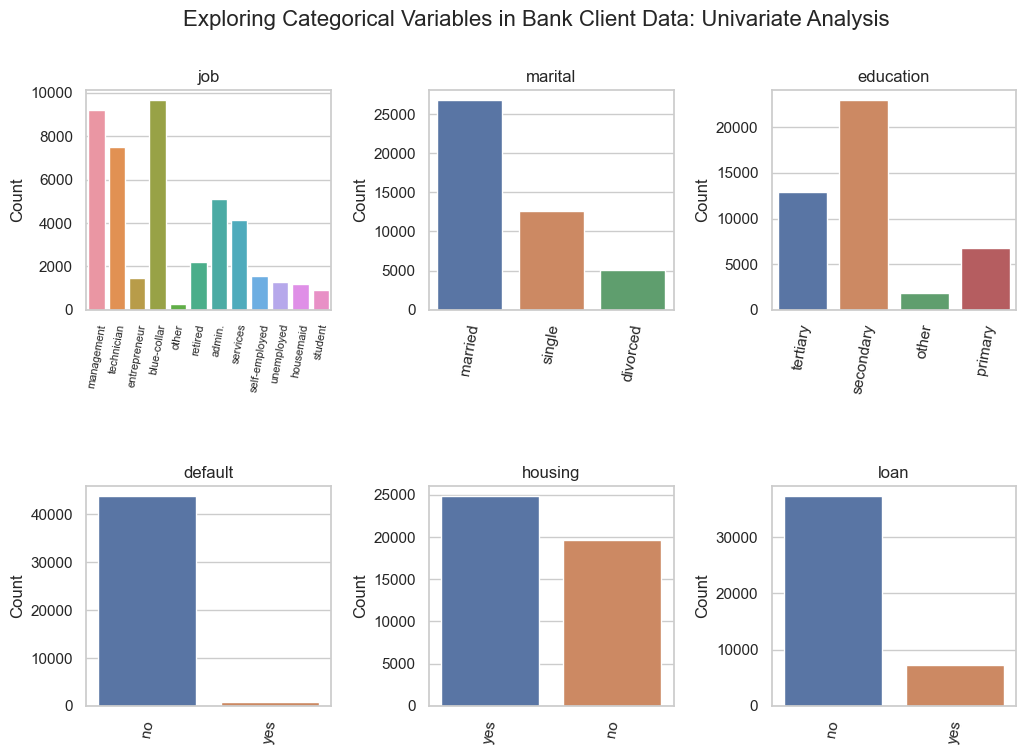

In [42]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Categorical columns to plot
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan']

# Plot bar plots for each categorical column
for i, column in enumerate(categorical_columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    sns.countplot(data=data_bank, x=column, ax=ax)
    ax.set_title(column)
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=80)
    
    # Rotate x-axis labels for 'job' column
    if column == 'job':
        ax.tick_params(axis='x', rotation=80)
        ax.tick_params(axis='x', labelsize=8)  # Adjust font size

# Add general title to the entire set of subplots
plt.suptitle('Exploring Categorical Variables in Bank Client Data: Univariate Analysis', fontsize=16)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.8)

# Save the plot as a PNG file
plt.savefig('categorical_plots.png', dpi=300, bbox_inches='tight')

# Show the plots
plt.show()

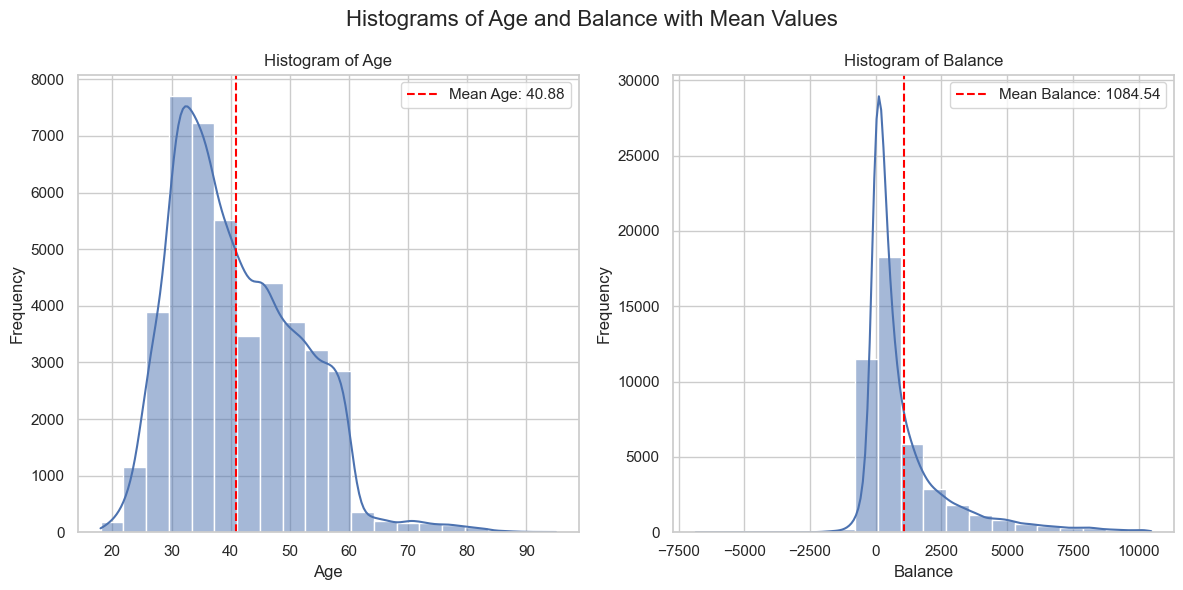

In [31]:
# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Histogram for Age
sns.histplot(data=data_bank, x='age', bins=20, kde=True, ax=axes[0])
mean_age = data_bank['age'].mean()
axes[0].axvline(mean_age, color='red', linestyle='dashed', label=f'Mean Age: {mean_age:.2f}')
axes[0].set_title('Histogram of Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Histogram for Balance
sns.histplot(data=data_bank, x='balance', bins=20, kde=True, ax=axes[1])
mean_balance = data_bank['balance'].mean()
axes[1].axvline(mean_balance, color='red', linestyle='dashed', label=f'Mean Balance: {mean_balance:.2f}')
axes[1].set_title('Histogram of Balance')
axes[1].set_xlabel('Balance')
axes[1].set_ylabel('Frequency')
axes[1].legend()

# Add a general title
plt.suptitle('Histograms of Age and Balance with Mean Values', fontsize=16)

# Adjust spacing between subplots
plt.tight_layout()

# Save the plots as PNG
plt.savefig('histograms_age_balance.png')

# Show the plots
plt.show()

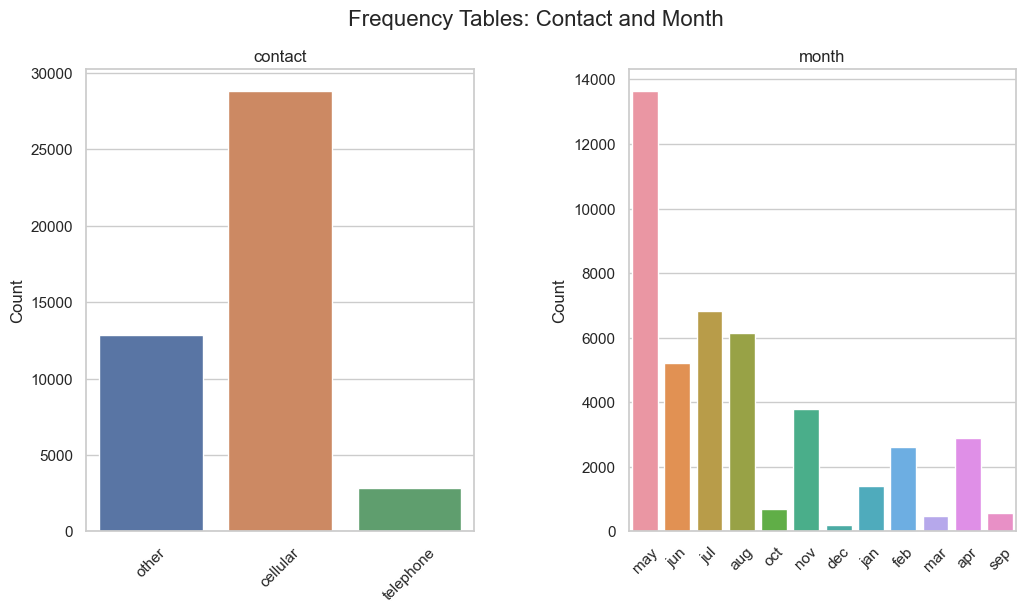

In [43]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Categorical columns to plot
categorical_columns = ['contact', 'month']

# Plot frequency tables for each categorical column
for i, column in enumerate(categorical_columns):
    ax = axes[i]
    
    sns.countplot(data=data_bank, x=column, ax=ax)
    ax.set_title(column)
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)
    
# Add general title
plt.suptitle('Frequency Tables: Contact and Month', fontsize=16)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Save the plot as PNG
plt.savefig('frequency_tables.png')

# Show the plot
plt.show()

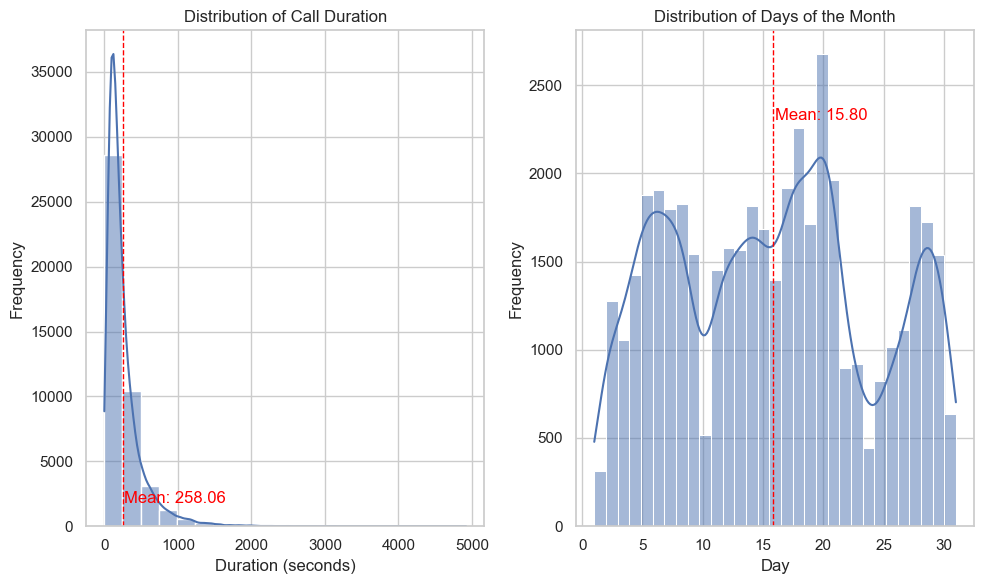

In [46]:
# Create a figure and axes
plt.figure(figsize=(10, 6))

# Create a histogram for 'duration'
plt.subplot(1, 2, 1)
sns.histplot(data=data_bank, x='duration', bins=20, kde=True)
plt.axvline(data_bank['duration'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.text(data_bank['duration'].mean() + 10, 1800, f'Mean: {data_bank["duration"].mean():.2f}', color='red')
plt.title('Distribution of Call Duration')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')

# Create a histogram for 'day'
plt.subplot(1, 2, 2)
sns.histplot(data=data_bank, x='day', bins=31, kde=True)
plt.axvline(data_bank['day'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.text(data_bank['day'].mean() + 0.2, 2300, f'Mean: {data_bank["day"].mean():.2f}', color='red')
plt.title('Distribution of Days of the Month')
plt.xlabel('Day')
plt.ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('duration_day_histograms_with_mean.png')

# Show the plot
plt.show()


Histogram plots for continuous variables

### Bivariate Analysis

Bivariate analysis involves exploring the relationship between two variables in a dataset. It helps us understand how changes in one variable affect another and whether there are any patterns, correlations, or trends between the variables.

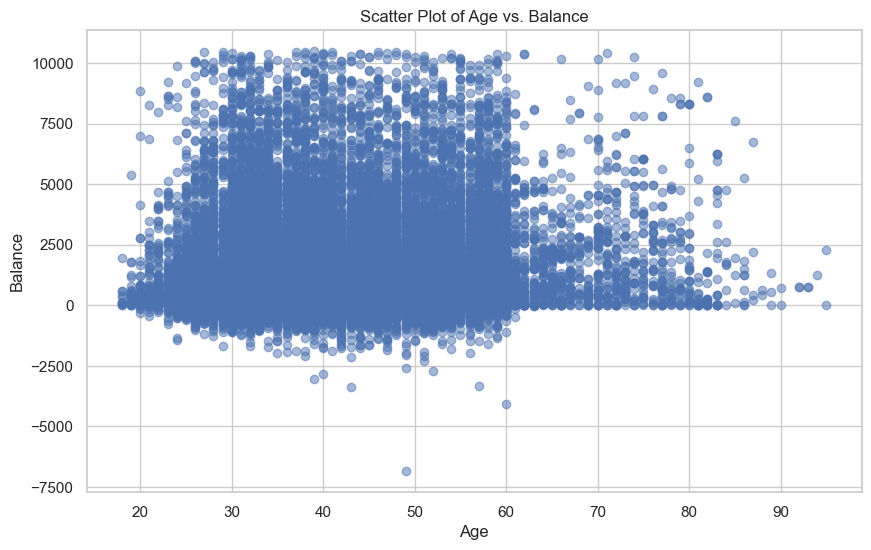

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(data_bank['age'], data_bank['balance'], alpha=0.5)
plt.title('Scatter Plot of Age vs. Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.grid(True)

# Save the plot as a PNG file
plt.savefig('scatter_age_balance.png')

plt.show()

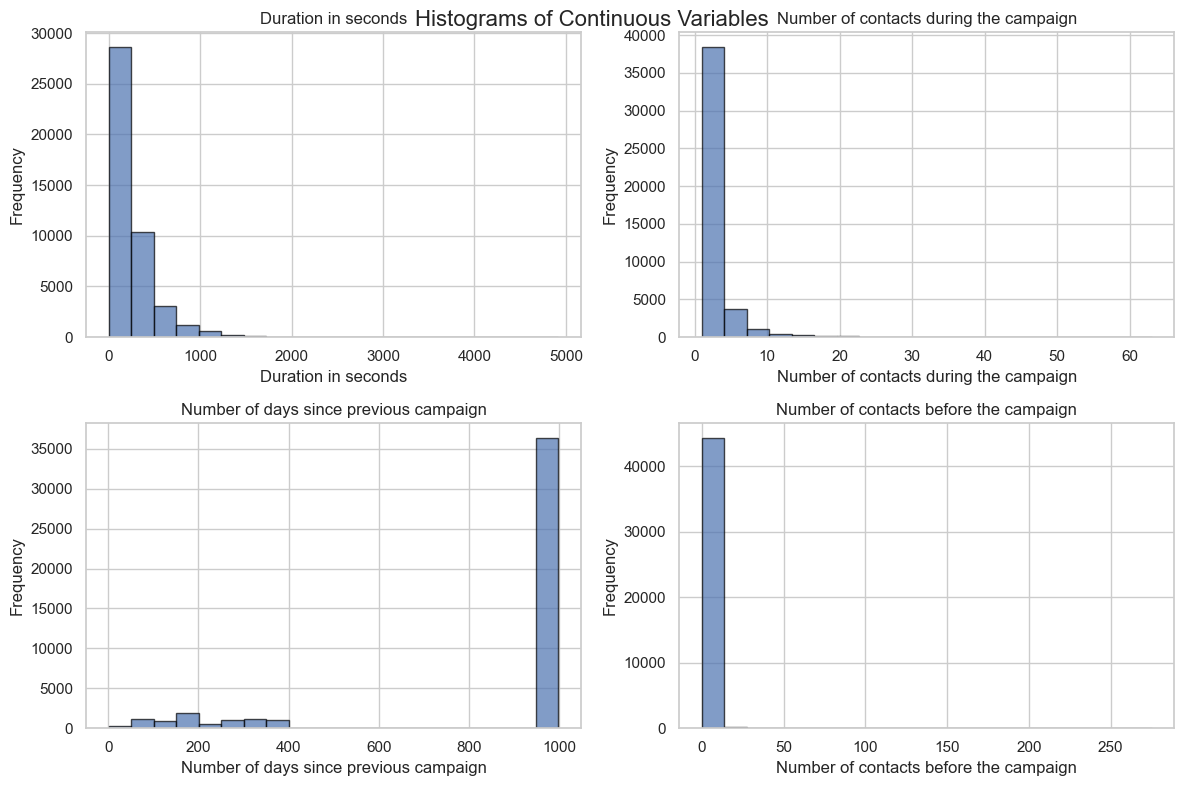

In [32]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Continuous variables to plot
continuous_vars = ['duration', 'campaign', 'pdays', 'previous']
titles = ['Duration in seconds', 'Number of contacts during the campaign', 
          'Number of days since previous campaign', 'Number of contacts before the campaign']

# Plot histograms for each continuous variable
for i, var in enumerate(continuous_vars):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    ax.hist(data_bank[var], bins=20, edgecolor='black', alpha=0.7)
    ax.set_title(titles[i])
    ax.set_xlabel(titles[i])
    ax.set_ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout()

# Add a general title
plt.suptitle('Histograms of Continuous Variables', fontsize=16)

# Save the figure as a PNG file
plt.savefig('continuous_histograms.png')

# Show the plots
plt.show()

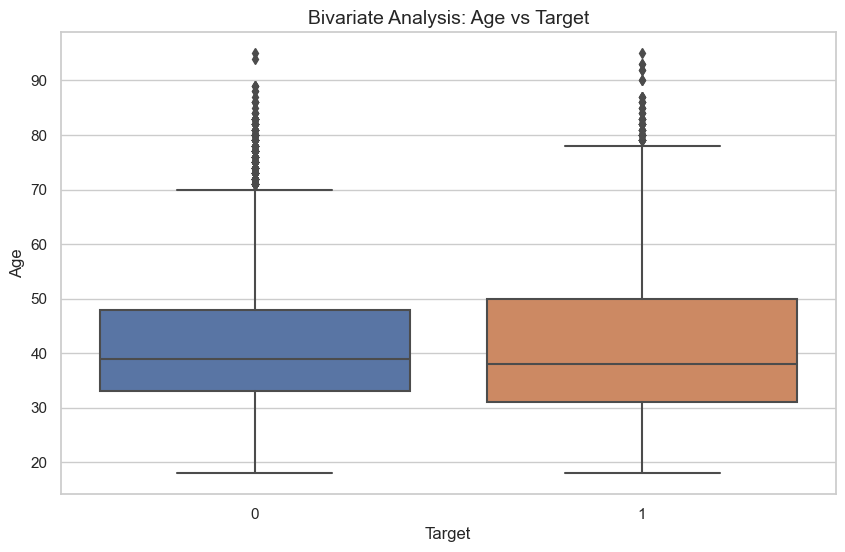

In [47]:
# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Bivariate analysis between 'age' and 'target'
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='age', data=data_bank)
plt.xlabel('Target', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.title('Bivariate Analysis: Age vs Target', fontsize=14)
# Save the figure as a PNG file
plt.savefig('Bivariate_analysis_age_target.png')
plt.show()

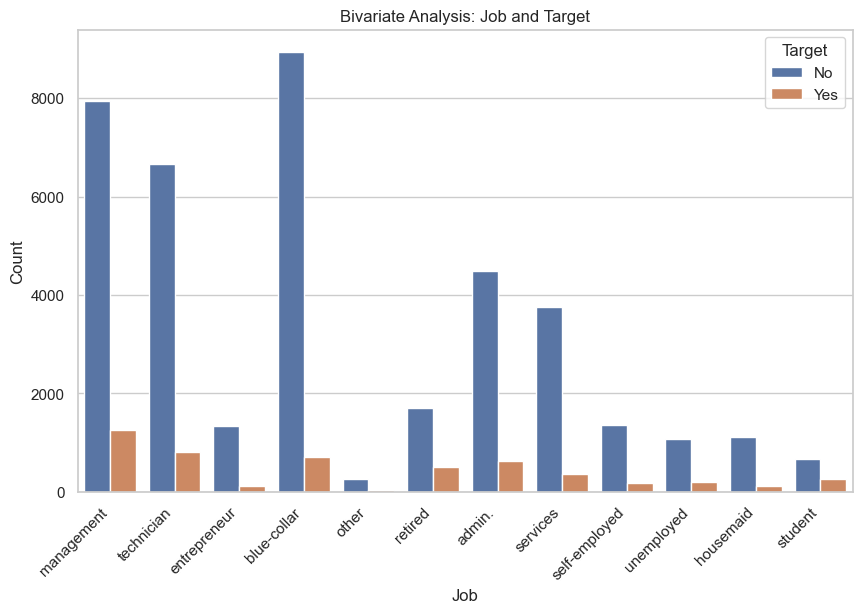

In [48]:
# Create a bar plot for bivariate analysis of 'Job' and 'Target'
plt.figure(figsize=(10, 6))
sns.countplot(data=data_bank, x='job', hue='target')
plt.title('Bivariate Analysis: Job and Target')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Add legend
plt.legend(title='Target', loc='upper right', labels=['No', 'Yes'])

# Save the plot as a PNG file
plt.savefig('bivariate_job_target.png')

# Show the plot
plt.show()

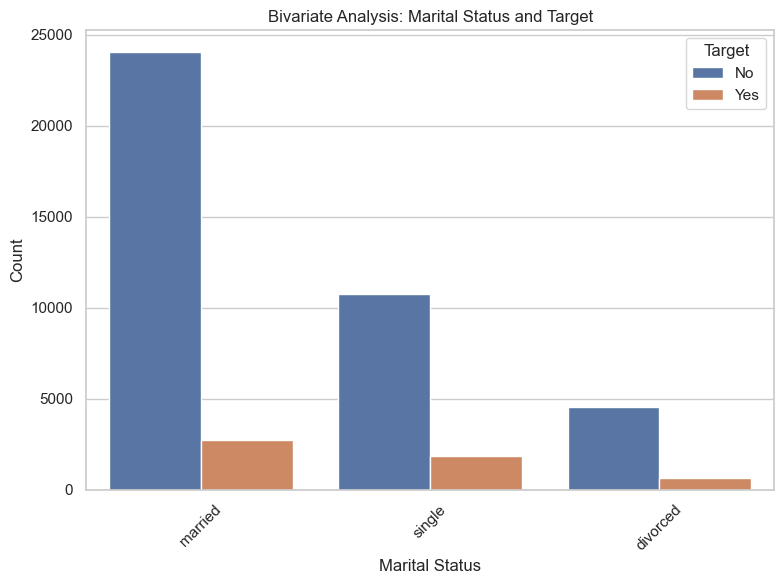

In [49]:
# Create a bar plot for marital status and target
plt.figure(figsize=(8, 6))
sns.countplot(data=data_bank, x='marital', hue='target')
plt.title('Bivariate Analysis: Marital Status and Target')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target', labels=['No', 'Yes'])

# Save the plot as a PNG file
plt.tight_layout()
plt.savefig('marital_target_bivariate.png')
plt.show()

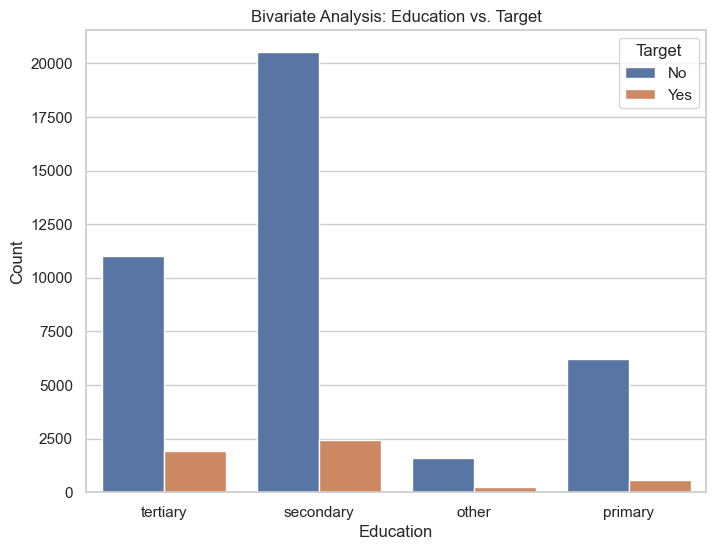

In [50]:
# Create a bar plot for bivariate analysis of education and target
plt.figure(figsize=(8, 6))
sns.countplot(data=data_bank, x='education', hue='target')
plt.title('Bivariate Analysis: Education vs. Target')
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend(title='Target', labels=['No', 'Yes'])

# Save the plot as a PNG file
plt.savefig('education_target_analysis.png')

# Show the plot
plt.show()

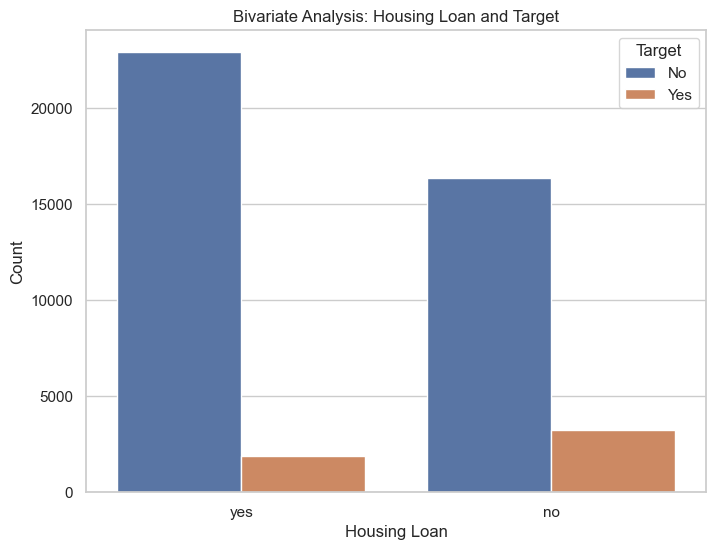

In [51]:
# Set up the figure and axis
plt.figure(figsize=(8, 6))

# Create a bar plot for bivariate analysis of 'housing' and 'target'
sns.countplot(data=data_bank, x='housing', hue='target')

# Set labels and title
plt.xlabel('Housing Loan')
plt.ylabel('Count')
plt.title('Bivariate Analysis: Housing Loan and Target')

# Add legend
plt.legend(title='Target', labels=['No', 'Yes'])

# Save the plot as a PNG image
plt.savefig('bivariate_housing_target.png')

# Show the plot
plt.show()

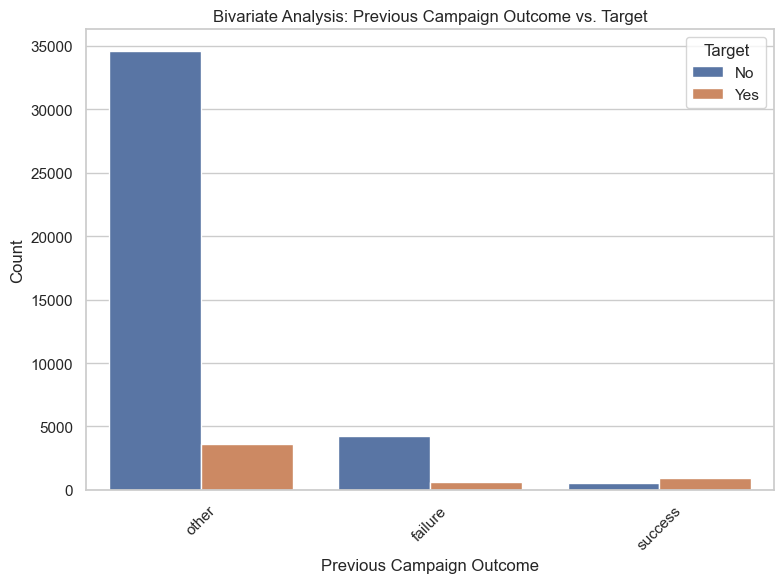

In [52]:
# Create a bar plot for bivariate analysis of 'poutcome' and 'target'
plt.figure(figsize=(8, 6))
sns.countplot(data=data_bank, x='poutcome', hue='target')
plt.title("Bivariate Analysis: Previous Campaign Outcome vs. Target")
plt.xlabel("Previous Campaign Outcome")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Target", labels=["No", "Yes"])

# Save the plot as a PNG file
plt.tight_layout()
plt.savefig('poutcome_target_analysis.png')

# Show the plot
plt.show()

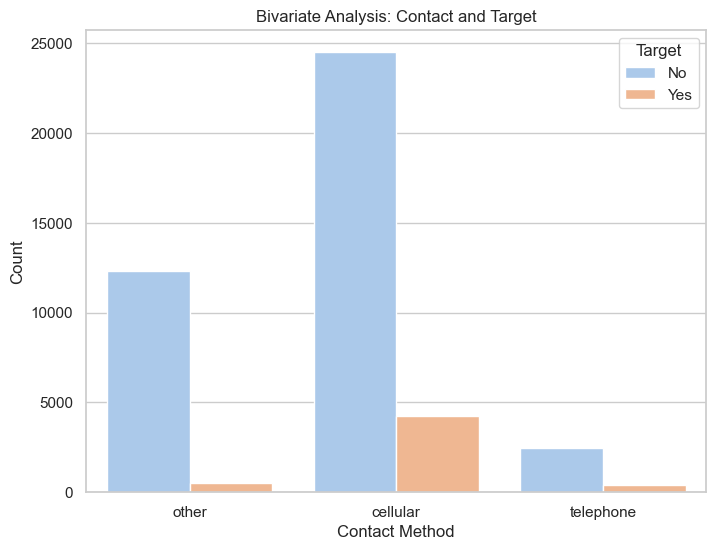

In [53]:
# Set style
sns.set(style="whitegrid")

# Create a bar plot for bivariate analysis of 'contact' and 'target'
plt.figure(figsize=(8, 6))
sns.countplot(data=data_bank, x='contact', hue='target', palette='pastel')

# Set title and labels
plt.title('Bivariate Analysis: Contact and Target')
plt.xlabel('Contact Method')
plt.ylabel('Count')

# Add legend
plt.legend(title='Target', labels=['No', 'Yes'])

# Save the plot as a PNG image
plt.savefig('contact_target_bivariate.png', bbox_inches='tight')

# Show the plot
plt.show()


Scatter matrix and Correlation matrix

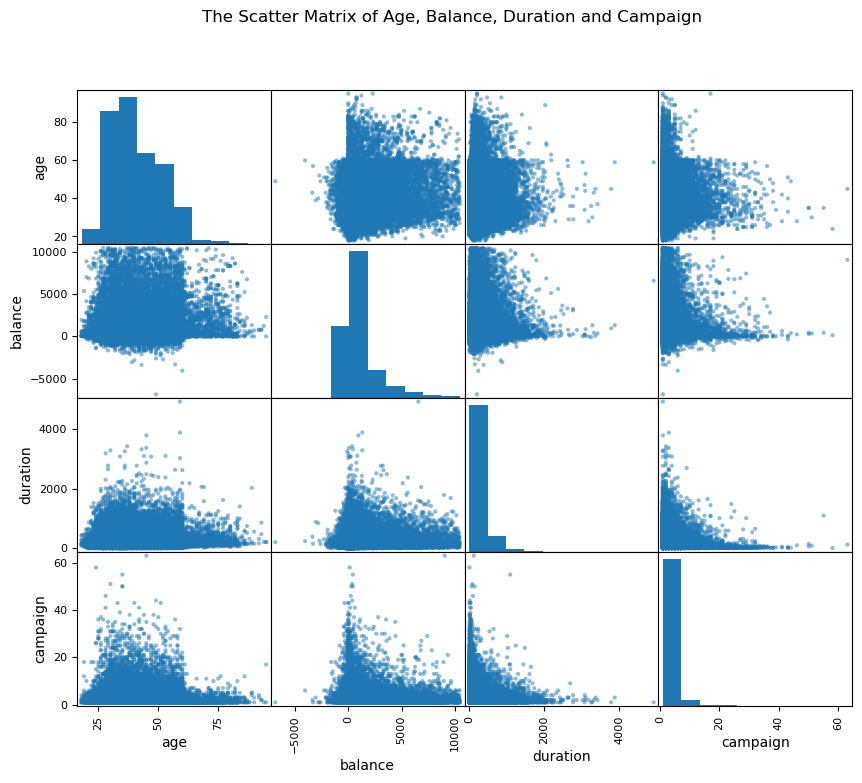

In [38]:
from pandas.plotting import scatter_matrix
matrix = scatter_matrix(data_bank[['age','balance','duration','campaign']],figsize=(10,8))

plt.suptitle('The Scatter Matrix of Age, Balance, Duration and Campaign')
plt.show()

Correlation matrix

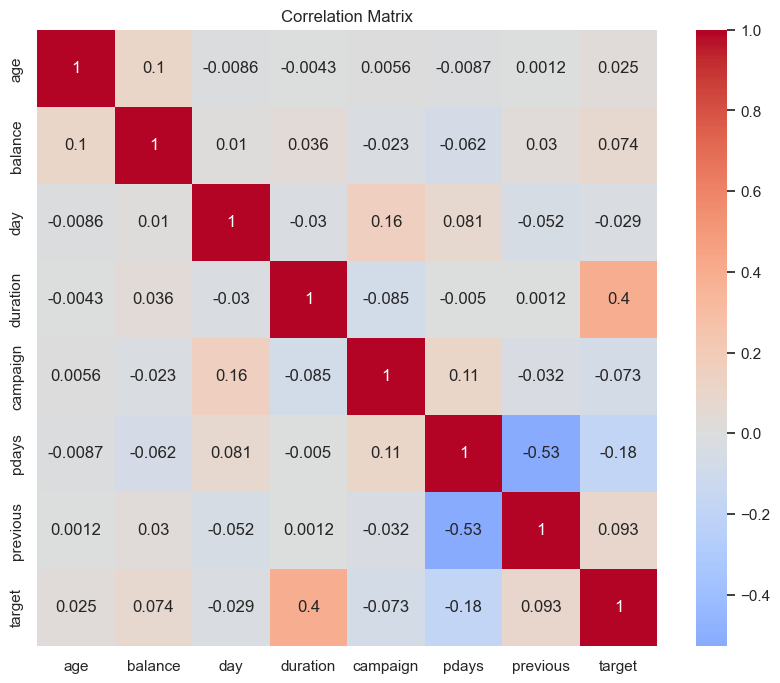

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = data_bank.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)

# Set the title
plt.title("Correlation Matrix")

# Save the figure as a PNG file
plt.savefig("correlation_matrix.png")

# Show the plot
plt.show()


Feature importances

### Inferential statistics:

### Statistical tests: 

In [58]:
import scipy.stats as stats

# Define two groups based on the target variable ('yes' and 'no')
group_yes = data_bank[data_bank['target'] == 'yes']['age']
group_no = data_bank[data_bank['target'] == 'no']['age']

# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(group_yes, group_no, equal_var=False)

# Define significance level (alpha)
alpha = 0.05

# Compare p-value with significance level
if p_value < alpha:
    result = "Statistically significant relationship"
else:
    result = "No statistically significant relationship"

# Print the result
print("T-Stat:", t_stat)
print("P-Value:", p_value)
print("Result:", result)


T-Stat: nan
P-Value: nan
Result: No statistically significant relationship


In [59]:
import pandas as pd
import scipy.stats as stats

# List of categorical input variables
categorical_vars = ['age', 'job', 'marital', 'education', 'housing', 'poutcome', 'contact']

# Create an empty DataFrame to store the results
results = pd.DataFrame(columns=['Variable', 'Chi-Square', 'P-Value', 'Significant'])

# Loop through each categorical variable and perform chi-squared test
for var in categorical_vars:
    contingency_table = pd.crosstab(data_bank[var], data_bank['target'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    
    # Compare p-value with significance level (alpha)
    alpha = 0.05
    significant = p < alpha
    
    results = results.append({'Variable': var, 'Chi-Square': chi2, 'P-Value': p, 'Significant': significant}, ignore_index=True)

# Save the results as a table
results.to_csv('chi_squared_results.csv', index=False)


/var/folders/q0/_mwwbx9d1yx0kcmsh745b0c80000gn/T/ipykernel_13802/4205062395.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': var, 'Chi-Square': chi2, 'P-Value': p, 'Significant': significant}, ignore_index=True)
/var/folders/q0/_mwwbx9d1yx0kcmsh745b0c80000gn/T/ipykernel_13802/4205062395.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': var, 'Chi-Square': chi2, 'P-Value': p, 'Significant': significant}, ignore_index=True)
/var/folders/q0/_mwwbx9d1yx0kcmsh745b0c80000gn/T/ipykernel_13802/4205062395.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': var, 'Chi-Square': chi2, 'P-Value': p, 'Significant': sign